In [1]:
import os
import re
import ROOT
import uproot
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
%matplotlib widget

Welcome to JupyROOT 6.28/11


In [2]:
def gaussian(x, mu, sig):
    return (1/(sig*np.sqrt(2.*np.pi)))*np.exp(-(x-mu)**2/(2*sig**2))

In [4]:
filename  = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/Time/fitted_timepdf.h5")
filename  = os.path.expandvars("$LUSTRE/Time/e-/tuning/pyfitqun/fitted_timepdf.h5")

In [5]:
with tb.open_file(filename) as f:
    pbins    = f.root.bins.momentum.read()
    tresbins = f.root.bins.tres    .read()
    μbins    = f.root.bins.μ       .read()

    direct_timepdfs = f.root.direct_timepdfs.read()

    gaussian_fits   = 2*[None]
    polynomial_fits = 2*[None] 
    for i, param_type in enumerate(["means", "sigmas"]):
        gaussian_fits  [i] = getattr(f.root.gaussian_fits  , param_type).read()
        polynomial_fits[i] = getattr(f.root.polynomial_fits, param_type).read()

ps    = (pbins[1:] + pbins[:-1])/2.
tress = (tresbins[1:] + tresbins[:-1])/2.
μs    = (μbins[1:] + μbins[:-1])/2.

### Gaussian fits

Selecting p = 400.511 MeV and log10(μ) = -1.74


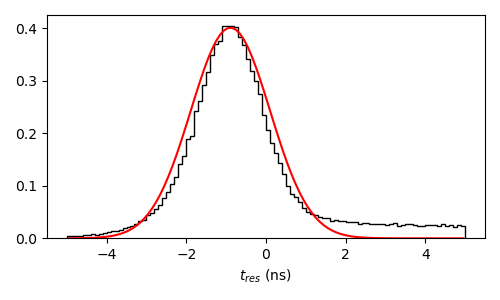

In [6]:
# select random momentum and μ bins

pindex = np.random.randint(len(ps)-1)
μindex = np.random.randint(len(μs)-1)

print(f"Selecting p = {ps[pindex]} MeV and log10(μ) = {μs[μindex]}")


plt.figure(figsize=(5, 3))

h = direct_timepdfs[pindex, :, μindex]
norm = np.sum(h*np.diff(tresbins))
plt.stairs(h/norm, tresbins, color="k")

mean  = gaussian_fits[0][pindex, μindex]
sigma = gaussian_fits[1][pindex, μindex]
plt.plot(tress, gaussian(tress, mean, sigma), color="r")

plt.xlabel(r"$t_{res}$ (ns)")
plt.tight_layout()

### Polynomial fits

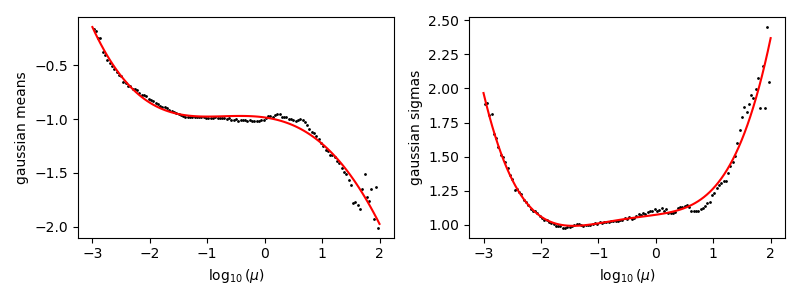

In [8]:
μsx = np.linspace(μbins[0], μbins[-1], 100)

plt.figure(figsize=(8, 3))

for i, param_type in enumerate(["means", "sigmas"]):

    plt.subplot(1, 2, i+1)
    plt.scatter(μs, gaussian_fits[i][pindex], s=1, color="k")
    poly_params = polynomial_fits[i][pindex]
    plt.plot(μsx, np.poly1d(np.flip(poly_params))(μsx), color="r")

    plt.xlabel(r"$\log_{10}(\mu)$")
    plt.ylabel(f"gaussian {param_type}")

plt.tight_layout()